In [56]:
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import seaborn as sns
from collections import Counter

In [99]:
def get_counts_from_many_ids(ids):
    counts = None
    for i in ids:
        if counts is None:
            counts = get_counts_from_id(i)
        else:
            counts = counts + get_counts_from_id(i)
    return counts

In [93]:
def get_counts_from_id(gutenberg_id, is_chinese = False):
    text = strip_headers(load_etext(gutenberg_id)).strip()
    if is_chinese:
        counts = Counter(list(text))
    else:
        counts = Counter(text.split())
    return counts

In [96]:
def plot_counts(counts):
    word_arr = counts.most_common(30)
    word_arr_encoded = []
    word_arr_numbers = []
    for k, v in word_arr:
        word_arr_encoded.append(k.encode('utf-8').decode('utf-8'))
        word_arr_numbers.append(v)
    sns.barplot(word_arr_encoded,word_arr_numbers)

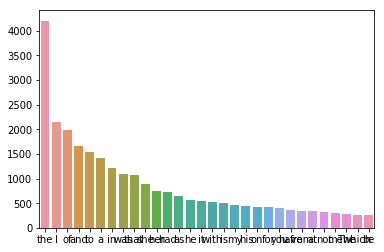

In [100]:
plot_counts(get_counts_from_many_ids([14419,59015]))